<a href="https://colab.research.google.com/github/flecue/xai-aaai2021/blob/main/XAI_EXAMPLE_exMatchina_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDITS: https://github.com/nesl/ExMatchina/

Used as part of AAAI 2021 Tutorial on XAI - https://xaitutorial2021.github.io/
                                          - https://github.com/flecue/xai-aaai2021

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Configuration

1- Make sure to get "XAI_EXAMPLE_exMatchina_ALL" from https://github.com/flecue/xai-aaai2021/tree/main/XAI_EXAMPLE_exMatchina_ALL

In [ ]:
%cd '/content/gdrive/MyDrive/dev'
%ls

/content/gdrive/MyDrive/dev
pulse/                            XAI_EXAMPLE_exMatchina_Image.ipynb
XAI_EXAMPLE_exMatchina_ALL/       XAI_EXAMPLE_exMatchina_Text.ipynb
XAI_EXAMPLE_exMatchina_ECG.ipynb


In [ ]:
!pip3 install -r XAI_EXAMPLE_exMatchina_ALL/requirements.txt

     |████████████████████████████████| 110.5MB 44kB/s 
     |████████████████████████████████| 20.0MB 1.3MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 3.8MB 34.0MB/s 
     |████████████████████████████████| 512kB 36.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=7e31b4e61994c9af77f0e2466d525e4f1ce920756dde40636590ac4b32e8680d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninsta

2- Make sure to get to right path

In [ ]:
%cd '/content/gdrive/MyDrive/dev'

In [ ]:
%ls XAI_EXAMPLE_exMatchina_ALL/Examples/

data/  Trained_Models/


2 - Make sure to get "data/" from https://drive.google.com/drive/folders/1ZRWIeUHxGbKpqWkJ2HpiSLtmUyllfThf

# Setup

In [ ]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

import sys
sys.path.append('./XAI_EXAMPLE_exMatchina_ALL')
from exmatchina import *

In [ ]:
num_classes = 5

classes = ['Non-ecotic beats (normal beat)', 
           'Supraventricular ectopic beats', 
           'Ventricular ectopic beats', 
           'Fusion beats', 
           'Unknown beats']


class_dict = {
    'Non-ecotic beats (normal beat)': 0,
    'Supraventricular ectopic beats': 1,
    'Ventricular ectopic beats': 2,
    'Fusion beats': 3,
    'Unknown beats': 4
}

inv_class_dict = {v: k for k, v in class_dict.items()}

## These are the randomly generated indices 

all_idx = [86,   228,   692,  1157,  1244]      #Considering just 5 samples

In [ ]:
x_train = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/ecg/X_train.npy')
y_train0 = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/ecg/y_train.npy')
x_test = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/ecg/X_test.npy')
y_test0 = np.load('XAI_EXAMPLE_exMatchina_ALL/Examples/data/ecg/y_test.npy')

y_train = to_categorical(y_train0, num_classes)
y_test = to_categorical(y_test0, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(87554, 186, 1)
(87554, 5)
(21892, 186, 1)
(21892, 5)


In [ ]:
model = load_model('XAI_EXAMPLE_exMatchina_ALL/Examples/Trained_Models/ecg.hdf5')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      [(None, 186, 1)]          0         
_________________________________________________________________
Conv1 (Conv1D)               (None, 181, 64)           448       
_________________________________________________________________
Bn1 (BatchNormalization)     (None, 181, 64)           256       
_________________________________________________________________
Mp1 (MaxPooling1D)  

# ExMatchina

In [ ]:
def plot_ecg(test, examples, label):
        # =======GENERATE STUDY EXAMPLES=========
    fig = plt.figure(figsize=(14,5))
    num_display = len(examples) +1
    fig.add_subplot(1, num_display, 1).title.set_text(inv_class_dict[label])
    plt.plot(test)
   # plt.axis('off')
    line = fig.add_subplot(1, 1, 1)
    line.plot([2.39,2.39],[0,1],'--')
    line.set_xlim(0,10)
    line.axis('off')
    for k in range(num_display-1):
        if k >= len(examples):
            continue
        fig.add_subplot(1,num_display,k+2).title.set_text(inv_class_dict[label])
        fig.add_subplot(1,num_display,k+2).title.set_color('#0067FF')
        plt.plot(examples[k])
       # plt.axis('off')
    
    fig.tight_layout()
    plt.tight_layout()
    plt.show()
    # plt.savefig('./image-' + str(i) + '-example.png', bbox_inches='tight')

In [ ]:
selected_layer = 'Flatten'

exm = ExMatchina(model=model, layer=selected_layer, examples=x_train)

Getting activations...
Getting labels...
Generating activation matrix...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

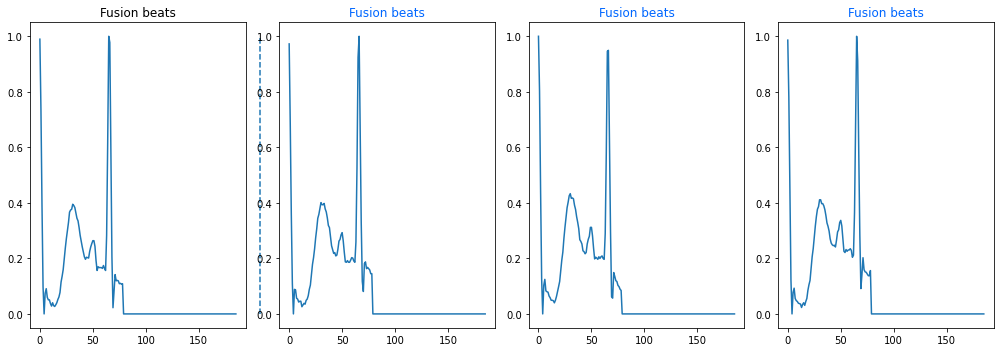

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

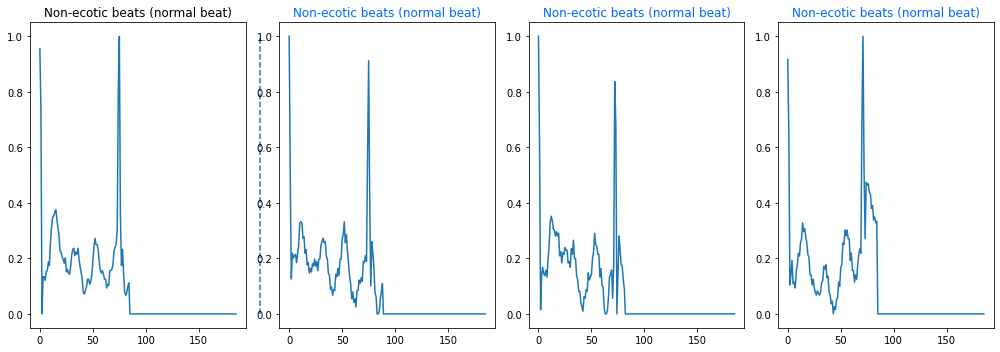

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

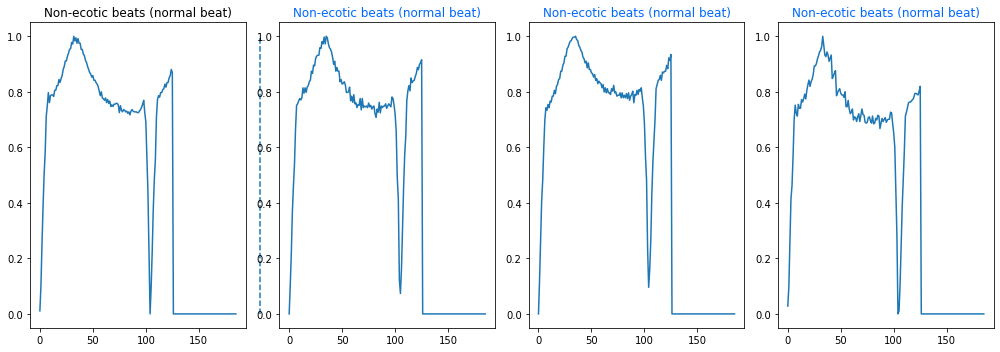

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

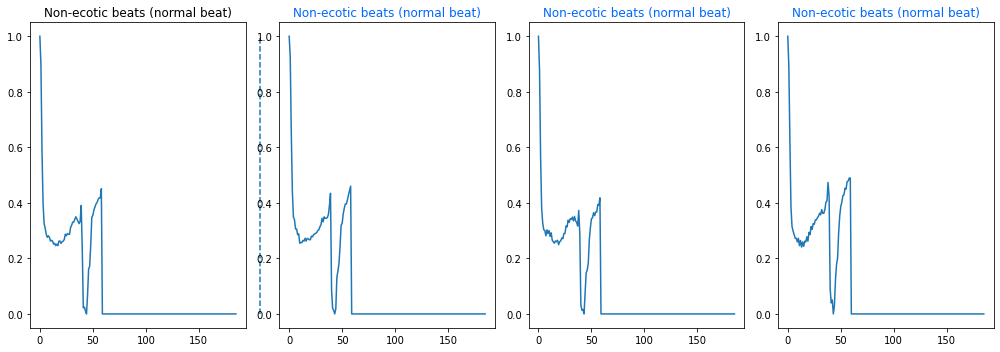

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

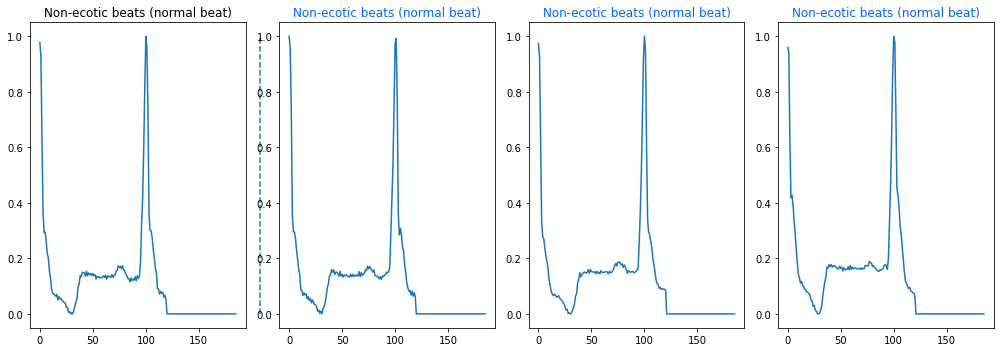

In [ ]:
for test_idx in all_idx:
    test_input = x_test[test_idx]
    label = exm.get_label_for(test_input)
    (examples, indices) = exm.return_nearest_examples(test_input, 3)
    plot_ecg(test_input, examples, label)